# Importing libraries

In [1]:
!pip install gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import gdown
import zipfile

# Loading,unzipping,saving and reading the CSV file

The gdown library that we hesd here is a Python library used for downloading files from Google Drive using their shared file links. It provides a convenient way to access and retrieve files hosted on Google Drive, making it especially useful when you want to programmatically download files without needing to manually log in to a Google account or interact with the Google Drive web interface.

In [2]:
warnings.filterwarnings('ignore')

# Exctracting the id from url
file_id = '1Qnp0WeRAlycJLGsr4ghyB-TzS4cQpaLl'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'Mo-Alrz.zip'

# Download the file from Google Drive
gdown.download(url, output, quiet=False)

# Unzipping and saving in extracted directory
extracted = "Mohammad Alirezaee-Home Assignment"
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extracted)

csv_file_path = f"{extracted}/Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv"

# Loading data into a pandas dataframe 
df = pd.read_csv(csv_file_path)

Downloading...
From: https://drive.google.com/uc?id=1Qnp0WeRAlycJLGsr4ghyB-TzS4cQpaLl
To: C:\Users\malir\Mo-Alrz.zip
100%|█████████████████████████████████████████████████████████████████████████████| 3.66M/3.66M [00:00<00:00, 4.84MB/s]


# Inspecting the data and its characteristics

First step to build a machine learning model is the Exploratory analysis and data preparation, but in this case because we have certain steps to take and because the focus of this course is on building data models using machine learning algorithms, i will stick to those particular steps, just before that, i will try to become familiar with the dataset husing .head(), .describe(), .info() and .skew() methods.

In [3]:
df.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1554.0,1630.0,NaN
1,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5775.0,5998.0,NaN
2,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15026.0,15643.0,NaN
3,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37335.0,38794.0,NaN
4,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82382.0,85404.0,NaN
5,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,65-74,128349.0,132400.0,NaN
6,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,75-84,137362.0,140693.0,NaN
7,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,85+,119833.0,121695.0,NaN
8,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,Not stated,12.0,12.0,NaN
9,06/25/2023,01/01/2020,06/24/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,All Ages,527628.0,542269.0,NaN


In [4]:
df.describe()

,Year,Month,COVID-19 Deaths,Number of Mentions
count,571320.000000,521640.000000,4.111710e+05,4.167610e+05
mean,2021.304348,6.071429,1.266096e+02,1.362334e+02
std,1.039850,3.425349,3.052289e+03,3.279466e+03
min,2020.000000,1.000000,0.000000e+00,0.000000e+00
25%,2020.000000,3.000000,0.000000e+00,0.000000e+00
50%,2021.000000,6.000000,0.000000e+00,0.000000e+00
75%,2022.000000,9.000000,1.900000e+01,2.100000e+01
max,2023.000000,12.000000,1.135624e+06,1.135624e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583740 entries, 0 to 583739
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Data As Of          583740 non-null  object 
 1   Start Date          583740 non-null  object 
 2   End Date            583740 non-null  object 
 3   Group               583740 non-null  object 
 4   Year                571320 non-null  float64
 5   Month               521640 non-null  float64
 6   State               583740 non-null  object 
 7   Condition Group     583740 non-null  object 
 8   Condition           583740 non-null  object 
 9   ICD10_codes         583740 non-null  object 
 10  Age Group           583740 non-null  object 
 11  COVID-19 Deaths     411171 non-null  float64
 12  Number of Mentions  416761 non-null  float64
 13  Flag                172569 non-null  object 
dtypes: float64(4), object(10)
memory usage: 62.4+ MB


In [6]:
df.skew()

Year                    0.179602
Month                   0.188031
COVID-19 Deaths       184.751784
Number of Mentions    173.983042
dtype: float64

# Data Preparation

## Restrict the dataset , Start Date = "01/01/2020" , End Date = "06/24/2023"

In [7]:
df["Start Date"] = pd.to_datetime(df["Start Date"], format='%m/%d/%Y')
df["End Date"] = pd.to_datetime(df["End Date"], format='%m/%d/%Y')

start_date_filtered = pd.to_datetime('01/01/2020', format='%m/%d/%Y')
end_date_filtered = pd.to_datetime('06/24/2023', format='%m/%d/%Y')

filtered_df = df[(df["Start Date"] == start_date_filtered) & (df["End Date"] == end_date_filtered)]

Checking the restricted dates

In [8]:
filtered_df["Start Date"].unique()

array(['2020-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [9]:
filtered_df["End Date"].unique()

array(['2023-06-24T00:00:00.000000000'], dtype='datetime64[ns]')

## Remove rows not belonging to specific age groups

First we check the age groups values and we see 'Not stated' and 'All Ages' are not specific groups so we get rid of those

In [10]:
filtered_df["Age Group"].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+', 'Not stated', 'All Ages'], dtype=object)

In [11]:
for i in ["Not stated","All Ages"]:
  filtered_df = filtered_df[filtered_df['Age Group'] != i]

Then we check the age groups again to make sure

In [12]:
filtered_df['Age Group'].unique()

array(['0-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84',
       '85+'], dtype=object)

## Remove rows with the United States as State

In [13]:
filtered_df = filtered_df[filtered_df["State"] != "United States"]

Double check

In [14]:
filtered_df["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'New York City',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

## Investigate missing values, and deal with them if you find any

In [15]:
filtered_df.isnull().sum()

Data As Of               0
Start Date               0
End Date                 0
Group                    0
Year                  9752
Month                 9752
State                    0
Condition Group          0
Condition                0
ICD10_codes              0
Age Group                0
COVID-19 Deaths       1646
Number of Mentions    1572
Flag                  8106
dtype: int64

In [16]:
filtered_df["Data As Of"].value_counts()

06/25/2023    9752
Name: Data As Of, dtype: int64

In [17]:
filtered_df["Group"].value_counts()

By Total    9752
Name: Group, dtype: int64

In [18]:
filtered_df["Flag"].value_counts()

One or more data cells have counts between 1-9 and have been suppressed in accordance with NCHS confidentiality standards.    1646
Name: Flag, dtype: int64

We checked the missing values, but before handling those values we would like to get rid of unnecessary columns since it will ease the handling missing values step, so the column "Data As Of" because it has only one value and probably its the date of the day in which,the data file was created,"Year" and "Month" because the whole columns are empty, "Group" because only value is By Total and i dont think it can be of any interest to us,"ICD10_codes" maybe some high level jargon regarding the presentation of different types of viruse,"Flag" again has 8106 empty cells (aproximately 8106/9752 = 83 %) so i will get rid of this as well

In [19]:
filtered_df.drop(columns=["Data As Of","Group","Year","Month","ICD10_codes","Flag"],inplace=True)
filtered_df

,Start Date,End Date,State,Condition Group,Condition,Age Group,COVID-19 Deaths,Number of Mentions
230,2020-01-01,2023-06-24,Alabama,Respiratory diseases,Influenza and pneumonia,0-24,20.0,20.0
231,2020-01-01,2023-06-24,Alabama,Respiratory diseases,Influenza and pneumonia,25-34,103.0,108.0
232,2020-01-01,2023-06-24,Alabama,Respiratory diseases,Influenza and pneumonia,35-44,230.0,237.0
233,2020-01-01,2023-06-24,Alabama,Respiratory diseases,Influenza and pneumonia,45-54,547.0,564.0
234,2020-01-01,2023-06-24,Alabama,Respiratory diseases,Influenza and pneumonia,55-64,1188.0,1224.0
...,...,...,...,...,...,...,...,...
12413,2020-01-01,2023-06-24,Puerto Rico,COVID-19,COVID-19,45-54,439.0,439.0
12414,2020-01-01,2023-06-24,Puerto Rico,COVID-19,COVID-19,55-64,780.0,780.0
12415,2020-01-01,2023-06-24,Puerto Rico,COVID-19,COVID-19,65-74,1238.0,1238.0
12416,2020-01-01,2023-06-24,Puerto Rico,COVID-19,COVID-19,75-84,1640.0,1640.0


In [20]:
filtered_df.isnull().sum()

Start Date               0
End Date                 0
State                    0
Condition Group          0
Condition                0
Age Group                0
COVID-19 Deaths       1646
Number of Mentions    1572
dtype: int64

For the "COVID-19 Deaths" because this column contains the real values that was observed and if we plot the line,scatter, and box plots we see it does not have a normal distribution and because of fluctuations in number of deaths lots of data points treat like outliers, the reason is, during the pandemic we had some peaks which had a distribution(increasing,reaching the maximum and then decreasing). Although it wasnt possible to predict the pattern for the next peak and the plot of too many peaks that we have is completely imbalance. So filling missing values can not be a good idea because it will cause bias in our data and model predictions and even if we want to fill this data because of distribution and imbalance can not be filled with mean,median, or even if we want to fill with zero again it wil lead to have a completely biased predcitions and probably the loss function will be too high.

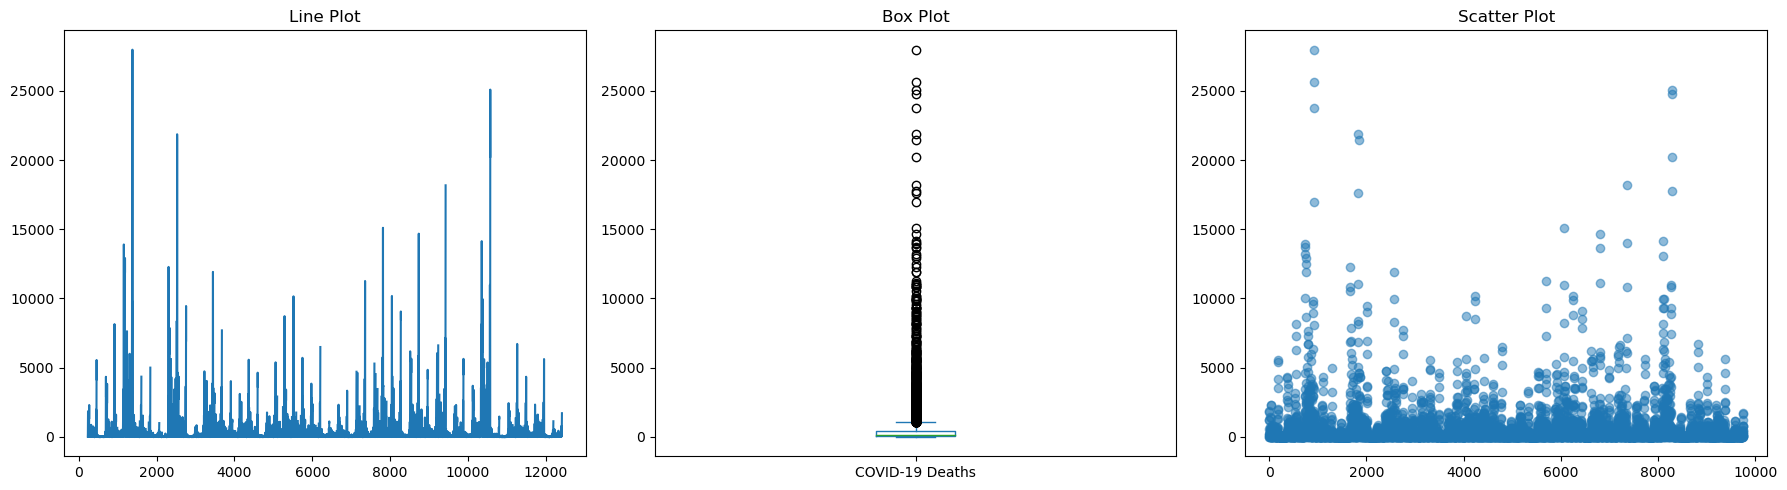

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

filtered_df["COVID-19 Deaths"].plot.line(ax=axes[0])
axes[0].set_title("Line Plot")

filtered_df["COVID-19 Deaths"].plot.box(ax=axes[1])
axes[1].set_title("Box Plot")

x_values = range(len(filtered_df))
y_values = filtered_df["COVID-19 Deaths"]
axes[2].scatter(x_values, y_values, marker='o', alpha=0.5)
axes[2].set_title("Scatter Plot")

plt.tight_layout()

plt.show()

So i simply drop the missing values (rows) in "COVID-19 Deaths"

In [22]:
filtered_df.dropna(subset=["COVID-19 Deaths"],inplace=True)

In [23]:
filtered_df.isnull().sum()

Start Date            0
End Date              0
State                 0
Condition Group       0
Condition             0
Age Group             0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64

We can see by dropping those missing values in "COVID-19 Deaths" column, those rows that were containing the missing values in "Number of Mentions" column were removed as well and the reason for that is the high correlation between these two columns in the primary dataset (df), and now we have handled all the missing values in our data set.

In [24]:
"{:.3f}".format(df["COVID-19 Deaths"].corr(df["Number of Mentions"]))

'0.987'

## Encode age groups as you see fit as numeric columns

In [25]:
age_group = {'0-24': 0,'25-34': 1,'35-44': 2,'45-54': 3,'55-64': 4,'65-74': 5,'75-84': 6,'85+': 7}
filtered_df["Age Group"] = filtered_df["Age Group"].map(age_group)

<AxesSubplot:title={'center':'Number of Deaths For each Age Group'}, xlabel='Age Group', ylabel='COVID-19 Deaths'>

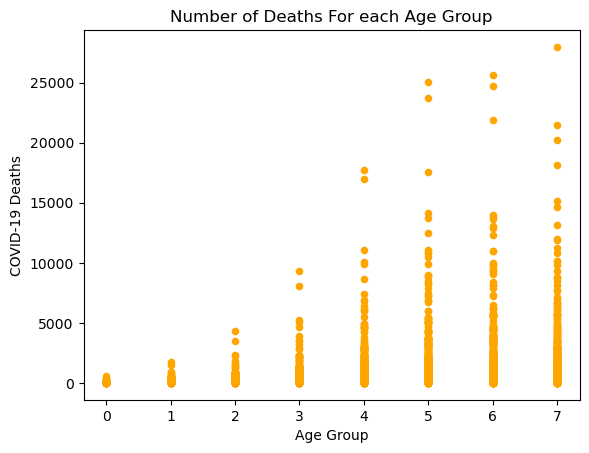

In [26]:
filtered_df[["COVID-19 Deaths","Age Group"]].plot.scatter(y="COVID-19 Deaths",x="Age Group",c="orange",title="Number of Deaths For each Age Group")

As we can see there is a clear relationship between age groups and number of deaths, the higher the age group, the higher the number of covid-19 deaths, so we can assume age group as a categorical variable that its order is important, this shows that one hot encoding won't be a good idea because the purpose of one hot encoding is to express order or magnitude of values within a categorical feature is not meaningful. One-hot encoding is particularly useful for categorical variables where the categories are nominal, meaning that they represent distinct and unrelated categories without any inherent order or ranking. Thus it is better to implement our models with label encoded data.

## Create a Broad Condition Group variable, which should be the same as the Condition Group variable for the two most frequent condition groups, but has the value "other" for all other condition groups.

In [27]:
# Finding two most frequent condition groups
condition_dict = filtered_df["Condition"].value_counts().to_dict()
two_most_frequent = sorted(condition_dict, key=condition_dict.get, reverse=True)[:2]

# Putting values in new cloumn and changing it into two most frequent and others
condition_dict = {k: k if k in two_most_frequent else "Other" for k in condition_dict}
filtered_df["Broad Condition Group"] = filtered_df["Condition"].map(condition_dict)

## Label-encode the Broad Condition Group variable.

In [28]:
# Encoding values into 0 1 2
broad_cond_grp = {'COVID-19':0, 'All other conditions and causes (residual)':1,"Other":2}
filtered_df["Broad Condition Group"] = filtered_df["Broad Condition Group"].map(broad_cond_grp)

## Here we reset the indexes because it's unsorted and untidy and we want those to begin from 0 and end at the number of length of the dataset

In [29]:
filtered_df = filtered_df.reset_index(drop=True)

## Scaling the features

In [30]:
print(f"Max:{filtered_df['COVID-19 Deaths'].max():.2f},Min:{filtered_df['COVID-19 Deaths'].min():.2f},Mean:{filtered_df['COVID-19 Deaths'].mean():.2f},Standard Devation:{filtered_df['COVID-19 Deaths'].std():.2f}")

Max:27972.00,Min:0.00,Mean:541.72,Standard Devation:1470.82


Because "COVID-19 Deaths" is a continuous numerical variable with a significant range but other feature was transformed to 0-7 age groups,and because  "COVID-19 Deaths" vary a lot and contains remarkable number of outliers (as we can see it varies from 0 to 27972 with a mean of 541 and STD of 1470) and we are trying to implement some ML algortihms we should apply feature scaling on our features. For a column with these characteristics we will use Standardization to have a mean of 0 and a standard deviation of 1. It assumes that the data follows a normal distribution, but it can work reasonably well for many machine learning algorithms, even if the features are not normally distributed like our case. Standardization is less sensitive to outliers compared to Min-Max scaling.

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standardized = scaler.fit_transform(filtered_df[["Age Group","COVID-19 Deaths"]])
standardized = pd.DataFrame(standardized,columns=["Age Group","COVID-19 Deaths"])
print(f"Max:{standardized['COVID-19 Deaths'].max():.2f},Min:{standardized['COVID-19 Deaths'].min():.2f},Mean:{standardized['COVID-19 Deaths'].mean():.2f},Standard Devation:{standardized['COVID-19 Deaths'].std():.2f}")

Max:18.65,Min:-0.37,Mean:0.00,Standard Devation:1.00


We should bear in mind that scaling won't change the underlying distribution of the data. It only transforms the values within the same distribution to a new scale or range. The purpose of scaling is to make the values more suitable for certain machine learning algorithms and to ensure that they have similar scales for better model performance. We plot the same line,scatter and box plots for "COVID-19 Deaths" To see that the distribuiton remains the same after scaling.

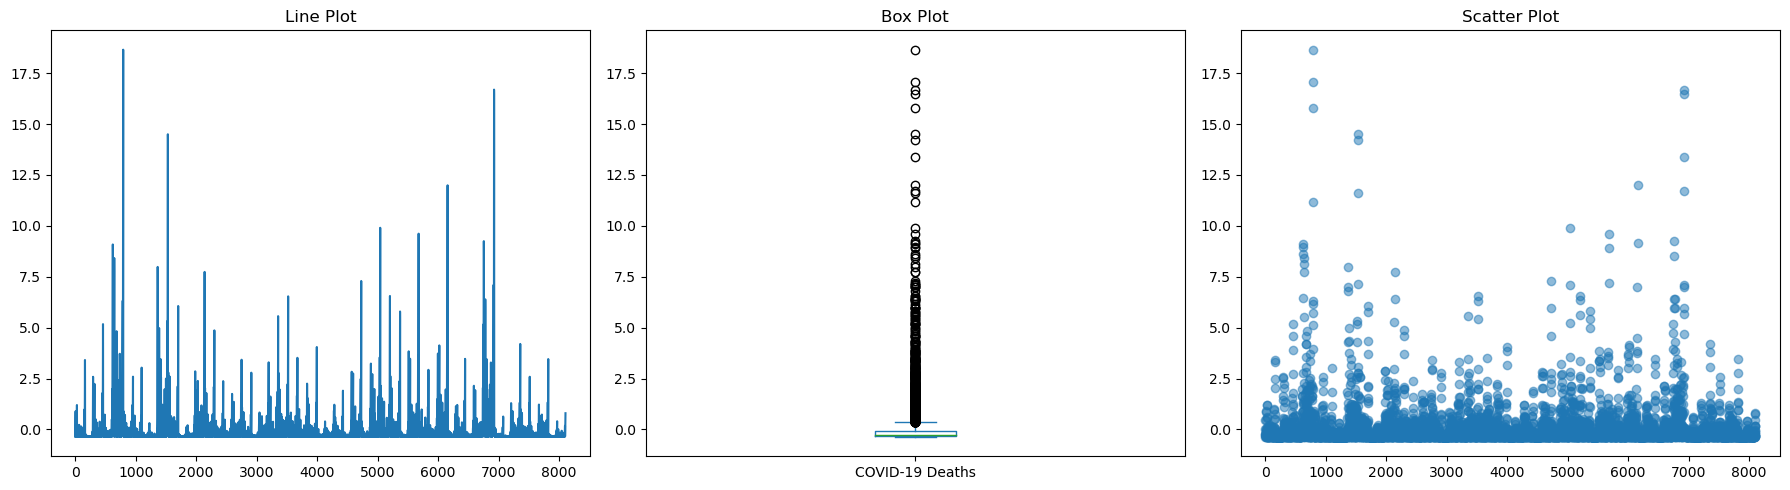

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

standardized["COVID-19 Deaths"].plot.line(ax=axes[0])
axes[0].set_title("Line Plot")

standardized["COVID-19 Deaths"].plot.box(ax=axes[1])
axes[1].set_title("Box Plot")

x_values = range(len(standardized))
y_values = standardized["COVID-19 Deaths"]
axes[2].scatter(x_values, y_values, marker='o', alpha=0.5)
axes[2].set_title("Scatter Plot")

plt.tight_layout()

plt.show()

## Keeping Features and Target and removing other unnecessary columns

Retain the columns that are relevant and informative for our analysis or modeling (Features and target) and delete columns that do not provide useful information, are redundant, or are unrelated to our analysis or modeling task. This can include columns with constant values, identifiers, metadata, or columns that we have decided are not relevant to the problem you are solving. Eventually the pre-processed dataset that we are going to work with, will be named final_df.

In [33]:
final_df = pd.concat([standardized, filtered_df["Broad Condition Group"]], axis=1)

# Defining the functions that we will need to assess and evaluate our models

## Plotting decision boundaries

In [34]:
def visualize_decision_boundary(clf, feature_1=final_df["Age Group"], feature_2=final_df["COVID-19 Deaths"], y=final_df["Broad Condition Group"], n_steps = 80, cmap="prism", title=None):
  
  xmin, xmax = feature_1.min(), feature_1.max()
  ymin, ymax = feature_2.min(), feature_2.max()

  xstep = (xmax - xmin)/(n_steps - 1)
  ystep = (ymax - ymin)/(n_steps - 1)

  xs = np.arange(xmin, xmax, xstep)
  ys = np.arange(ymin, ymax, ystep)

  grid_xs, grid_ys = np.meshgrid(xs, ys)

  df_grid = pd.DataFrame({"feature_1": grid_xs.flatten(), "feature_2": grid_ys.flatten()})

  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df_grid["pred"] =  clf.predict(df_grid[["feature_1", "feature_2"]].values)

  ax = df_grid.plot.scatter("feature_1", "feature_2", c="pred", cmap=cmap, title=title, colorbar=False, alpha=0.3)
  ax.scatter(feature_1, feature_2, c=y, cmap=cmap, marker="x", s=100)
  
  plt.show()

## Plotting ROC and AUC

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

def roc_auc(clf, modelname, X, y):
    vals = clf.predict_proba(X)
    n_classes = vals.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y, vals[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(
            fpr[i],
            tpr[i],
            lw=2,
            label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], color="navy", linestyle="--", label="Random classifier")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{modelname}: ROC curves")
    plt.legend(loc="lower right")
    plt.show()

## Confusion matrix and classification report

In [36]:
from sklearn.metrics import confusion_matrix

def conf_matrx(true_labels, predicted_labels,model_type):
    class_labels = ["red", "green", "yellow"]
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
    print(f"Confusion Matix For {model_type}")
    print(cm_df)

# Implementing classification algorithms and building models

## Train-Test Split

#### Train-test splitting is a fundamental technique in machine learning. It involves dividing our dataset into two subsets : a training set (usually 70-80 % of the data) and a test set (usually 30-20 % of the data). We fit our data on the training data (train the data), and we test our model (make predictions on target variable) on the test part, and because the test part is not seen by the model the results produced by that will be a good assessment of how well our model performs. A very crucial hyper parameter here is the random state which is used to increase the reproduce-ability and also it helps us to get same output whenever we run this notebook. It is neseccary to go with the same random state untill the end of our tasks.
- The train-validation-test split is a variation of the traditional train-test split that includes an additional validation set and we are going to use. This method is particularly useful when we want to fine-tune hyperparameters and evaluate our model's performance more rigorously. So we will first train our data and make predictions on X_validation (validation dataset) then find the best hyper parameters, and with those hyper parameters predict the X_test data set to get the best results and model. So we will with most common proportion which is 70 % For train, then 30% for temp which is divided into 15 % validation and 15 % test.

In [37]:
from sklearn.model_selection import train_test_split
X = final_df[["Age Group","COVID-19 Deaths"]]
y = final_df[["Broad Condition Group"]]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## K Nearest Neighbor

#### K-Nearest Neighbors (KNN) is a simple and intuitive supervised machine learning algorithm used for classification and regression tasks (In our case for classification). It's a non-parametric and instance-based learning algorithm, meaning it doesn't make strong assumptions about the underlying data distribution. Instead, it makes predictions based on the proximity (similarity) of data points in a feature space. In other words it is called K Nearest Neighbour because it considers the K closest data points (neighbors) in the training dataset to make predictions.
#### In implementing these algorithm n_neighbours (K) is our hyper parameter and can significantly impact the performance of the KNN algorithm. A small K like 1 can lead to a noisy model that might overfit the data, while a large K can lead to a smoother decision boundary but might underfit the data. So it is extremely essential that we find the optimum K (Hyperparameter optimization step). There are two main methods for optimizing the K:
- The formula k = sqrt(N)/2 is a common heuristic for choosing the number of neighbors (K) in the K-Nearest Neighbors (KNN) algorithm. However, it's important to remember that this is a rule of thumb and should be used as a starting point rather than a strict rule. The value of K chosen using this formula can be too large for many datasets (like our dataset in which the k value will be 40), leading to a KNN model that is overly complex and potentially overfits the data

- The other thing we know is that when we have two features like our case we need to provide an odd number for K, so we tried k = 1,3,5. The metrics for 5 was higher and more reasonable, i didn't go further (k = 7,9,...) because even if they provide better answer our model will be much more complex and we always want to avoid that and have a simple model that is computationally affordable as well.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

scores = []
for i in [1,3,5]:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    knn_valid_preds = knn.predict(X_validation)

    knn_valid_precision = precision_score(y_validation, knn_valid_preds, average='weighted')
    knn_valid_recall = recall_score(y_validation, knn_valid_preds, average='weighted')
    knn_valid_f1 = f1_score(y_validation, knn_valid_preds, average='weighted')
    knn_valid_acc = accuracy_score(y_validation, knn_valid_preds)
    scores.append(f"for n_neighbors = {i} -> Presicion:{knn_valid_precision:.3f},Recall:{knn_valid_recall:.3f},F1:{knn_valid_f1:.3f},Accuracy:{knn_valid_acc:.3f}")

for i in scores:
    print(i)

for n_neighbors = 1 -> Presicion:0.861,Recall:0.844,F1:0.852,Accuracy:0.844
for n_neighbors = 3 -> Presicion:0.858,Recall:0.868,F1:0.863,Accuracy:0.868
for n_neighbors = 5 -> Presicion:0.859,Recall:0.874,F1:0.866,Accuracy:0.874


####  Hyperparameter in these metrics is average, in multiclass classification, it's common to have class imbalances where some classes have significantly more instances than others. The weighted precision considers the class imbalance by assigning a weight to each class based on its relative frequency in the dataset. 
#### Now we train the model with best hyper parametes on the full training set and make predictions on X_test

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

knn_precision = precision_score(y_test, knn_preds, average='weighted')
knn_recall = recall_score(y_test, knn_preds, average='weighted')
knn_f1 = f1_score(y_test, knn_preds, average='weighted')
knn_acc = accuracy_score(y_test, knn_preds)

# We will create this dictionary and score the matrics of each model in that so in the end we'll have a table for comparing
scores_dict = {"KNN":["{:.4f}".format(knn_precision),"{:.4f}".format(knn_recall),
                      "{:.4f}".format(knn_f1),"{:.4f}".format(knn_acc)]}

## Logistic Regression

#### Logistic Regression can be extended to handle multiclass classification problems, which involve predicting one of multiple classes, in our case because we have 3 classes in our target variable, The use of hyper parameter class_weight="balanced" which in scikit-learn's LogisticRegression class is designed to handle multiclass classification problems, and it will automatically adjust the class weights based on the distribution of classes in your training data. Here because we don't have hyperparameter i will our X_temp and y_temp not validation and test.

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train,y_train)
logreg_preds = logreg.predict(X_temp)

In [41]:
logreg_precision = precision_score(y_temp, logreg_preds, average='weighted')
logreg_recall = recall_score(y_temp, logreg_preds, average='weighted')
logreg_f1 = f1_score(y_temp, logreg_preds, average='weighted')
logreg_acc = accuracy_score(y_temp, logreg_preds)

scores_dict["Logistic Regression"] = ["{:.4f}".format(logreg_precision),"{:.4f}".format(logreg_recall),
                                      "{:.4f}".format(logreg_f1),"{:.4f}".format(logreg_acc)]

#### Feature Importance

In [42]:
feature_importance = logreg.coef_[0]
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, feature_importance))

for feature, importance in feature_importance_dict.items():
    print(f'{feature}: {importance:.4f}')

Age Group: -0.5047
COVID-19 Deaths: 0.8894


- an increase in "Age Group" is associated with a decrease in the log-odds of being in class 0,1,2
- an increase in "COVID-19 Deaths" is associated with an increase in the log-odds of being in class 0,1,2

In [43]:
intercept = logreg.intercept_
intercept

array([-0.31635027,  0.08053558,  0.2358147 ])

- Intercept for Class 0: The baseline log-odds of being in Class 0 when all feature values are zero, compared to Class 1 and Class 2. In this case, the log-odds are approximately 0.5977 for Class 0.
- Intercept for Class 1: The baseline log-odds of being in Class 1 when all feature values are zero, compared to Class 0 and Class 2. In this case, the log-odds are approximately 0.2139 for Class 1.
- Intercept for Class 2: The baseline log-odds of being in Class 2 when all feature values are zero, compared to Class 0 and Class 1. In this case, the log-odds are approximately -0.8116 for Class 2.

## SVM : Linear

####  Linear SVMs can work well with categorical data. Each category becomes a binary feature, and SVMs aim to find a hyperplane that best separates the classes in the feature space. We can use the polynomial kernel as well (SVM polynomial) but because the dataset is too large and it is time consuming with 2,3,4,5 degrees we will only go with the linear version.

In [44]:
from sklearn.svm import SVC

svm_linear = SVC(kernel="linear", probability=True)
svm_linear.fit(X_train,y_train)
svm_linear_preds = svm_linear.predict(X_temp)

In [45]:
svm_linear_precision = precision_score(y_temp, svm_linear_preds, average='weighted')
svm_linear_recall = recall_score(y_temp, svm_linear_preds, average='weighted')
svm_linear_f1 = f1_score(y_temp, svm_linear_preds, average='weighted')
svm_linear_accuracy = accuracy_score(y_temp, svm_linear_preds)

scores_dict["SVM Linear"] = ["{:.4f}".format(svm_linear_precision),"{:.4f}".format(svm_linear_recall),"{:.4f}".format(svm_linear_f1),"{:.4f}".format(svm_linear_accuracy)]

## Decision Tree

#### A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It is a tree-like model that makes decisions based on a set of rules or conditions applied to input data. Decision trees are particularly useful for tasks that involve identifying a sequence of choices or conditions to arrive at a decision or prediction

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dec_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, random_state=42, class_weight="balanced")
dec_tree.fit(X_train,y_train)
dec_tree_preds = dec_tree.predict(X_temp)

In [47]:
dec_tree_precision = precision_score(y_temp, dec_tree_preds, average='weighted')
dec_tree_recall = recall_score(y_temp, dec_tree_preds, average='weighted')
dec_tree_f1 = f1_score(y_temp, dec_tree_preds, average='weighted')
dec_tree_accuracy = f1_score(y_temp, dec_tree_preds, average='weighted')

scores_dict["Decision Tree"] = ["{:.4f}".format(dec_tree_precision),"{:.4f}".format(dec_tree_recall),
                                      "{:.4f}".format(dec_tree_f1),"{:.4f}".format(dec_tree_accuracy)]

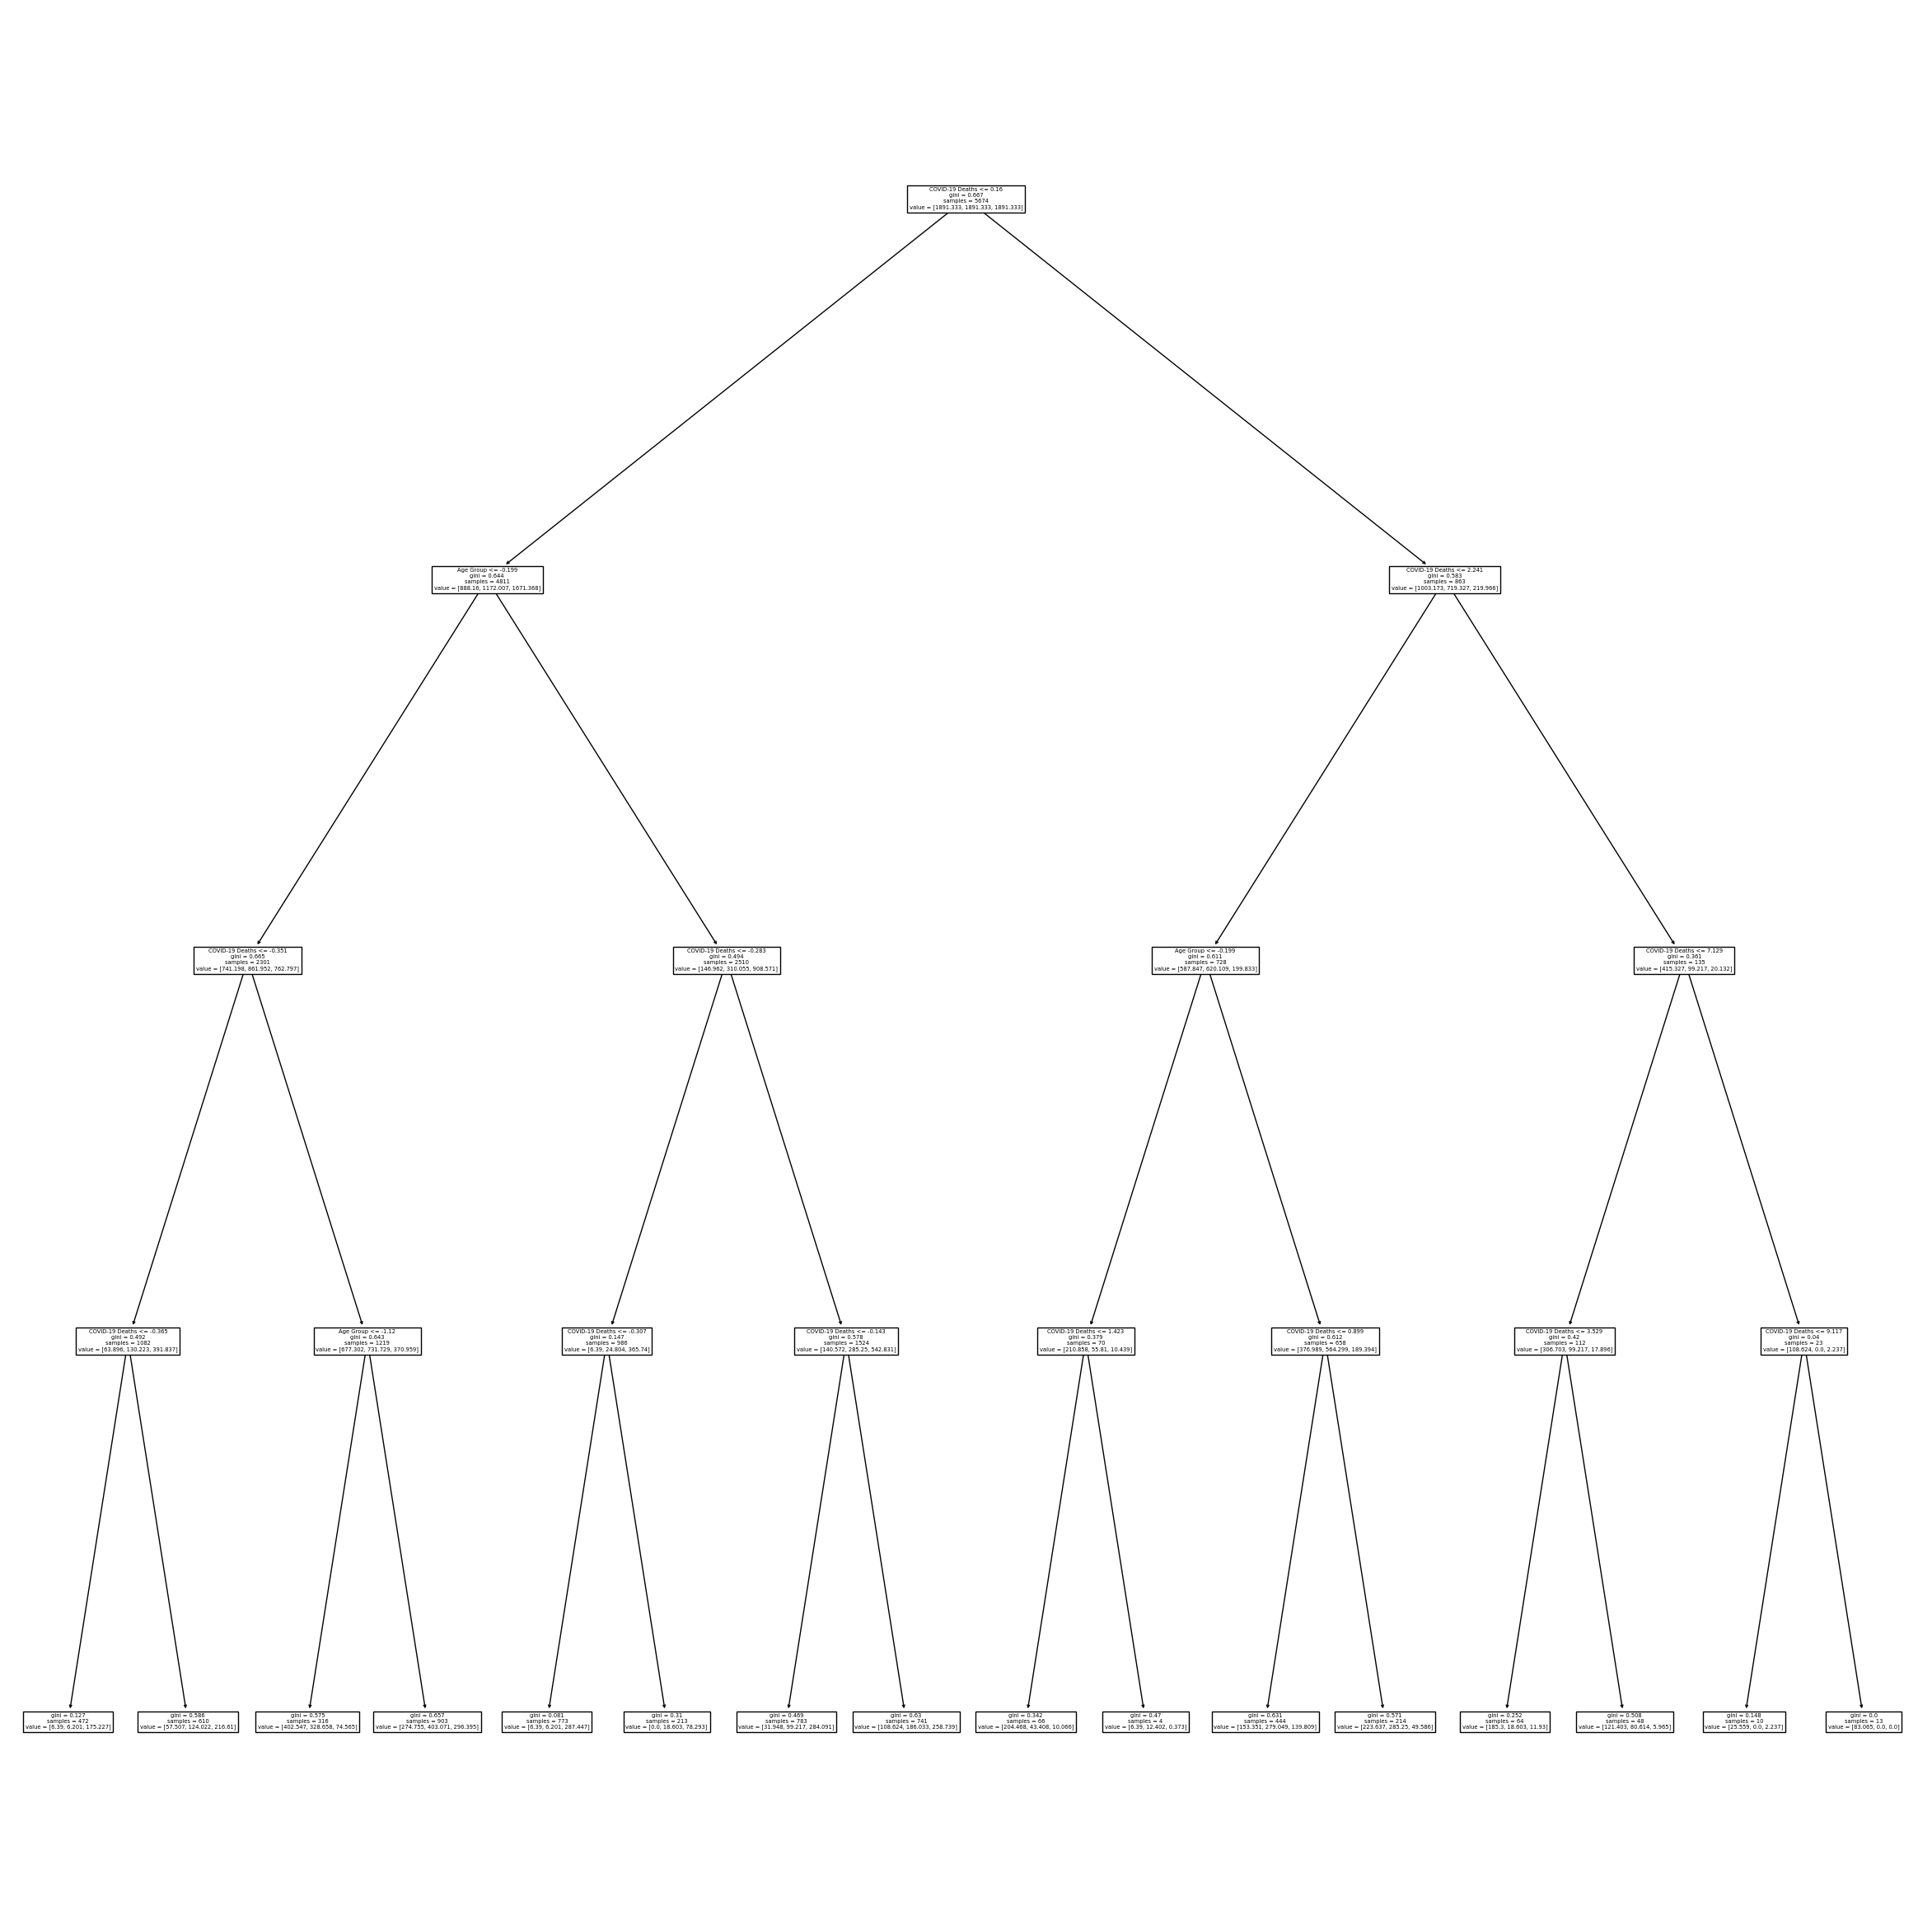

In [48]:
plt.figure(figsize=(30,30))
tree.plot_tree(dec_tree, feature_names=dec_tree.feature_names_in_)
plt.show()

Here we can see that our decision tree did not stop as our max_depth=4 and min_samples_leaf=3, these two hyperparameters are exactly the tools for controlling the size and depth of our decision tree, we can further increase max_depth or reduce min_samples_leaf to make the tree simpler. However, it's important to strike a balance between a tree that's too shallow (underfitting) and one that's too deep (overfitting) to your data. We can adjust these hyperparameters based on our specific dataset and requirements and i reached to these numbers as best hyper paramaters so the max_depth=4 and min_samples_leaf=3 where our best hyper parameters.

# Evaluation and assessment

## Accuracy metrics

In [49]:
scores_df = pd.DataFrame(scores_dict,index=['Precision', 'Recall', 'F1','Accuracy'])
scores_df

,KNN,Logistic Regression,SVM Linear,Decision Tree
Precision,0.8752,0.8817,0.8458,0.8928
Recall,0.8939,0.6957,0.9054,0.6464
F1,0.8837,0.7651,0.8628,0.7362
Accuracy,0.8939,0.6957,0.9054,0.7362


By taking a look and comparing the metrcis scores for our 4 models, we can see that the KNN and SVM linear are doing better in comparison with other models. SVM linear has higher Recall and Accuracy while KNN has slightly bigger Precision and F1. But it depends on what purpose we have and what we expect from our models. Although these two are generally doing better but taking a more accurate look we can see that Decision Tree has the highest precision (0.8928), KNN has the highest recall (0.8939), and Logistic Regression has the highest F1 Score (0.7651). SVM Linear has the highest accuracy (0.9054).
The choice of the best model depends on the specific problem and the trade-offs we want to make between precision, recall, and other metrics. It's common to consider a combination of these metrics to make a decision about which model performs best for a particular task.
In our case because we have imbalanced classes, I think we should consider precision and recall. A high precision model is useful when minimizing false positives is crucial, while a high recall model is important when we want to minimize false negatives. The F1 Score is often used to strike a balance between precision and recall.

## Decision boundaries

Decision boundaries can help us to gain a better vision of how well the model is dealing witht the class imbalance.

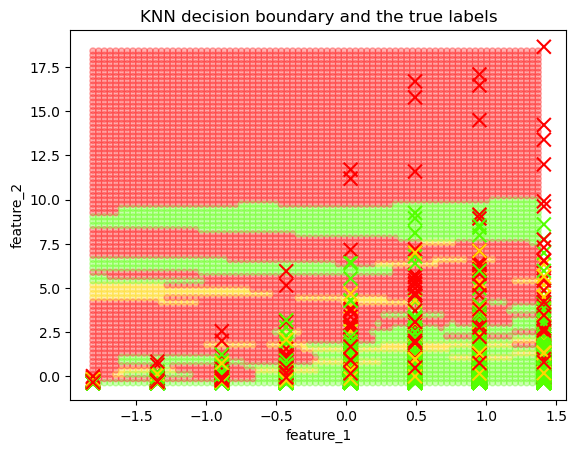

In [50]:
visualize_decision_boundary(knn, title="KNN decision boundary and the true labels")

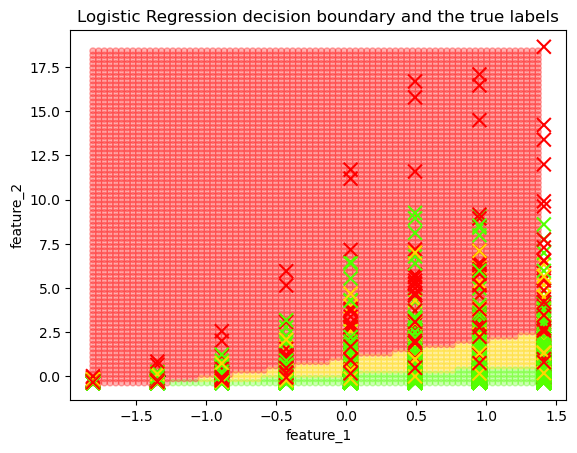

In [51]:
visualize_decision_boundary(logreg, title="Logistic Regression decision boundary and the true labels")

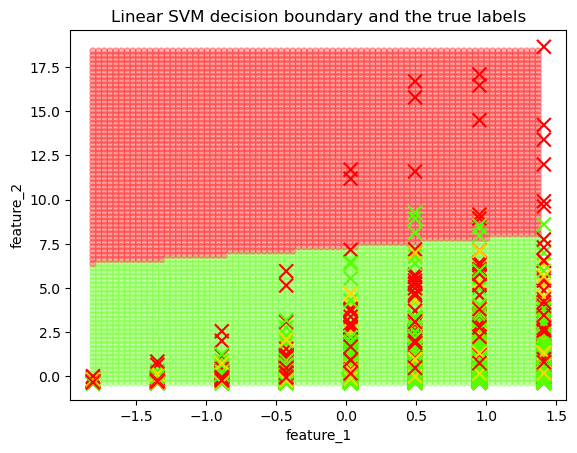

In [52]:
visualize_decision_boundary(svm_linear, title="Linear SVM decision boundary and the true labels")

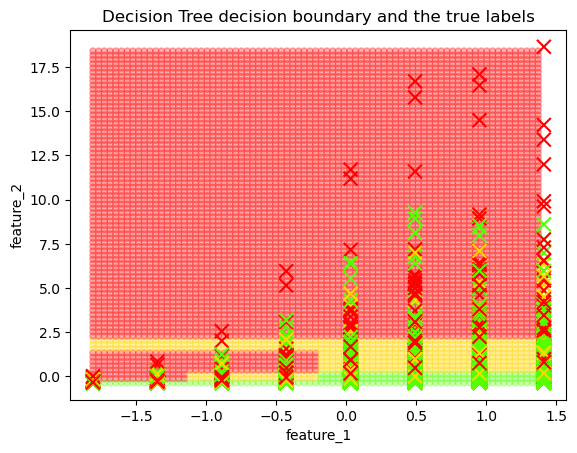

In [53]:
visualize_decision_boundary(dec_tree, title="Decision Tree decision boundary and the true labels")

By comparing these plots we can clearly see that SVM has some overlap betweeb yellow and green class while knn,logistic regression and decision tree are doing well in distinguishing between different classes 

## Receiver operating characteristic curve (ROC) and area under curve (AUC)

We can generate ROC curves for each class separately. Each ROC curve represents the binary classification performance for one class against all the other classes.

For each class, we calculate the AUC for its corresponding ROC curve. Each AUC represents how well the model distinguishes that class from all other classes.

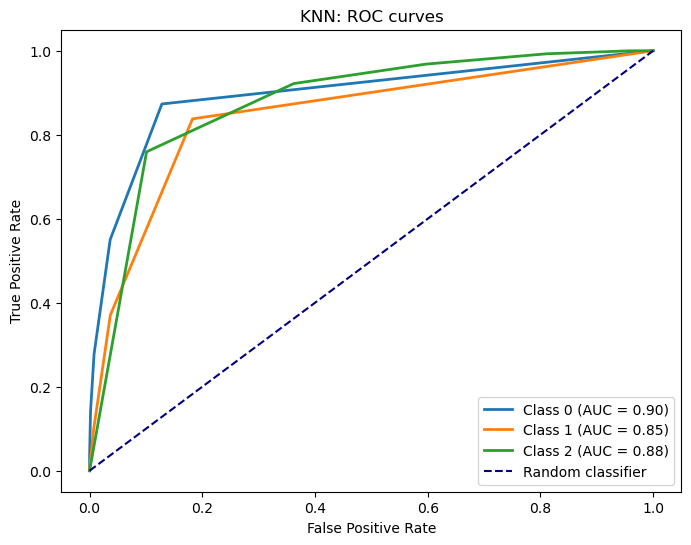

In [54]:
roc_auc(knn,"KNN",X,y)

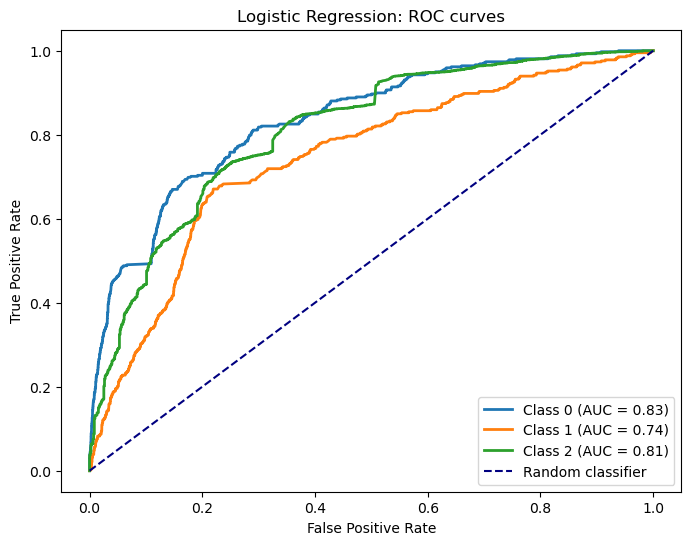

In [55]:
roc_auc(logreg,"Logistic Regression",X,y)

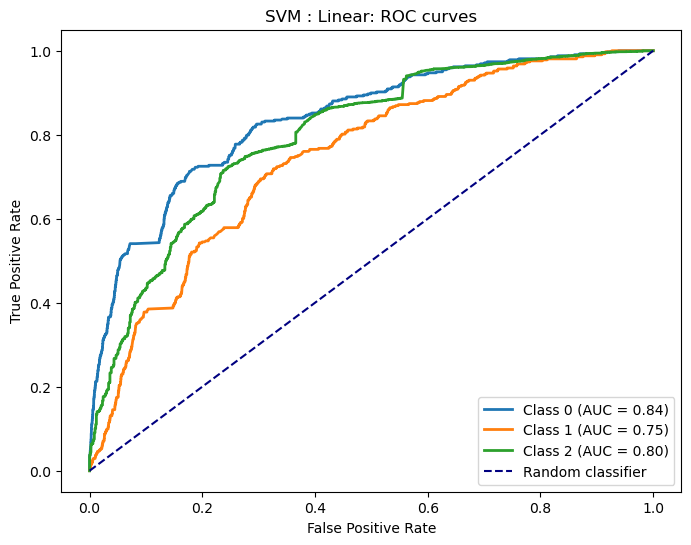

In [56]:
roc_auc(svm_linear,"SVM : Linear",X,y)

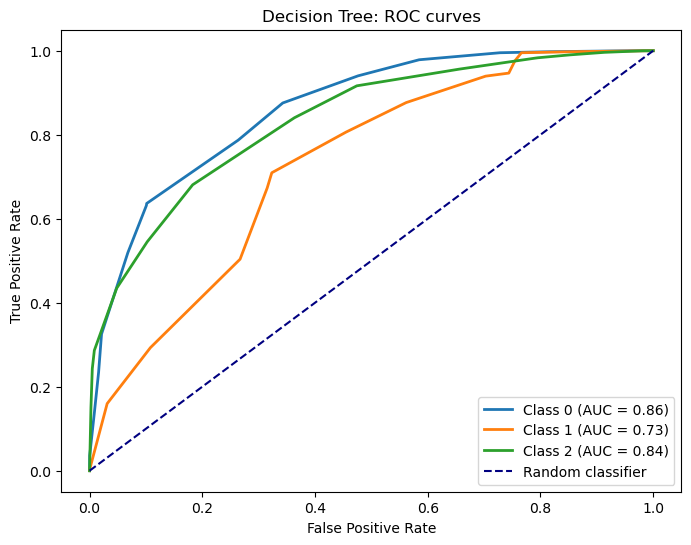

In [57]:
roc_auc(dec_tree,"Decision Tree",X,y)

We can see that the KNN is providing the highest AUC for each class amongst all our models and it generally indicates that the model is performing very well in terms of distinguishing each class from the others. This is a positive sign and suggests that the model is an excellent choice for our task.

## Confusion Matrix

A confusion matrix is a table that is used to describe the performance of a classification model on a set of test data for which the true values are known. It allows us to visualize the model's performance by showing how many instances were correctly or incorrectly classified. Below we will see the confusion matrix for each model. Another usage of this matrix is that we can manually calculate the accuracy metrics for our models using the Ture/Flase positives and True/False negatives

- Accuracy: (TP + TN) / (TP + TN + FP + FN)
- Precision (Positive Predictive Value): TP / (TP + FP)
- Recall (Sensitivity or True Positive Rate): TP / (TP + FN)
- Specificity (True Negative Rate): TN / (TN + FP)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [58]:
conf_matrx(y_test,knn_preds,"KNN")

Confusion Matix For KNN
        red  green  yellow
red      28      5      32
green     5      5      44
yellow   25     18    1054


For the "red" class:

- True Positives (TP): 28 instances were correctly classified as "red."
- False Positives (FP): 5 instances were incorrectly classified as "red" when they were not.
- False Negatives (FN): 25 instances that were actually "red" were incorrectly classified as something else.
  
For the "green" class:

- True Positives (TP): 5 instances were correctly classified as "green."
- False Positives (FP): 5 instances were incorrectly classified as "green" when they were not.
- False Negatives (FN): 18 instances that were actually "green" were incorrectly classified as something else.

For the "yellow" class:

- True Positives (TP): 1054 instances were correctly classified as "yellow."
- False Positives (FP): 32 instances were incorrectly classified as "yellow" when they were not.
- False Negatives (FN): 44 instances that were actually "yellow" were incorrectly classified as something else.

In [59]:
conf_matrx(y_temp,logreg_preds,"Logistic Regression")

Confusion Matix For Logistic Regression
        red  green  yellow
red      70     23      29
green    39     32      37
yellow  418    194    1590


For the "red" class:
- True Positives (TP): 70 instances were correctly classified as "red."
- False Positives (FP): 39 instances were incorrectly classified as "red" when they were not.
- False Negatives (FN): 418 instances that were actually "red" were incorrectly classified as something else.

For the "green" class:
- True Positives (TP): 32 instances were correctly classified as "green."
- False Positives (FP): 23 instances were incorrectly classified as "green" when they were not.
- False Negatives (FN): 194 instances that were actually "green" were incorrectly classified as something else.

For the "yellow" class:
- True Positives (TP): 1590 instances were correctly classified as "yellow."
- False Positives (FP): 29 instances were incorrectly classified as "yellow" when they were not.
- False Negatives (FN): 37 instances that were actually "yellow" were incorrectly classified as something else.

In [60]:
conf_matrx(y_temp,svm_linear_preds,"SVM linear")

Confusion Matix For SVM linear
        red  green  yellow
red       3      0     119
green     0      0     108
yellow    3      0    2199


For the "red" class:
- True Positives (TP): 3 instances were correctly classified as "red."
- False Positives (FP): 0 instances were incorrectly classified as "red" when they were not.
- False Negatives (FN): 3 instances that were actually "red" were incorrectly classified as something else.

For the "green" class:
- True Positives (TP): 0 instances were correctly classified as "green."
- False Positives (FP): 0 instances were incorrectly classified as "green" when they were not.
- False Negatives (FN): 0 instances that were actually "green" were incorrectly classified as something else.

For the "yellow" class:
- True Positives (TP): 119 instances were correctly classified as "yellow."
- False Positives (FP): 108 instances were incorrectly classified as "yellow" when they were not.
- False Negatives (FN): 2199 instances that were actually "yellow" were incorrectly classified as something else.

In [61]:
conf_matrx(y_temp,dec_tree_preds,"Decision Tree")

Confusion Matix For Decision Tree
        red  green  yellow
red      57     46      19
green    29     50      29
yellow  136    601    1465


For the "red" class:
- True Positives (TP): 57 instances were correctly classified as "red."
- False Positives (FP): 29 instances were incorrectly classified as "red" when they were not.
- False Negatives (FN): 136 instances that were actually "red" were incorrectly classified as something else.

For the "green" class:
- True Positives (TP): 46 instances were correctly classified as "green."
- False Positives (FP): 50 instances were incorrectly classified as "green" when they were not.
- False Negatives (FN): 601 instances that were actually "green" were incorrectly classified as something else.

For the "yellow" class:
- True Positives (TP): 19 instances were correctly classified as "yellow."
- False Positives (FP): 29 instances were incorrectly classified as "yellow" when they were not.
- False Negatives (FN): 1465 instances that were actually "yellow" were incorrectly classified as something else.

Why our confusion matrix does not provide True Negartives ? because in a multi-class classification context, TN values are not as commonly used as in binary classification. In multi-class classification, the focus is often on evaluating the model's ability to correctly classify each class against all other classes. As a result, the confusion matrix is typically structured to provide information about true positives (TP), false positives (FP), and false negatives (FN) for each class.

It seems that as we saw in the decision boundary the SVM linear had an overlap between yellow and green classes, we can see that in the confusuion matrix as well, because the value for TP and FP green is 0.

# Conclusion

We explored all the assessment tools and functions to evaluate and compare our models and as we mentioned before in every project the choose of models can be different based on the goal and expectations of the project. But a general guideline to choose best model can be defiend as below:
There can be 5 crucial factors to explore and choose the best model:
- 1-Project goal 
- 2-Analysis of the data (Size,Pre-processing and ...)
- 3-Speed and time of training 
- 4-Linearity 
- 5-Features and parameters
Ultimately, model selection is an iterative process that may involve trying multiple models, evaluating their performance, and refining our approach as we learn more about the problem and data. The best model for our specific task depends on a combination of these factors and our project's goals.